In [1]:
### K-Means intuition behind the algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

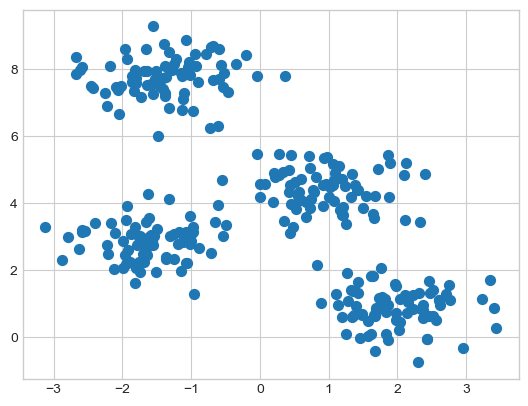

In [3]:
# import SciCit-Learn dataset and visualization
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

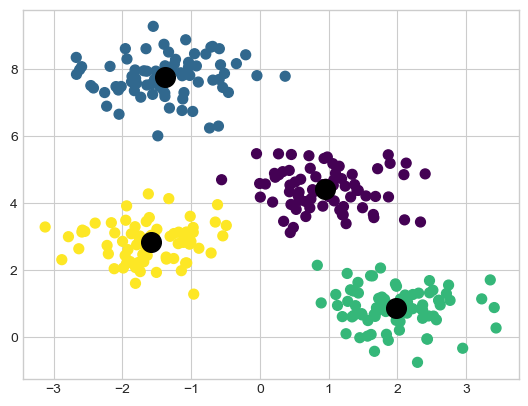

In [4]:
## K-Means algorithm from scratch

# Expectation-Maximization, EM
# Step E = Assign points to the cluster whose center is closest.
# Step M = Change the coordinates of the center of each cluster to the average of the coordinates of the points in it.

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    # choose the means at random
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # step E
        labels = pairwise_distances_argmin(X, centers)

        # step M
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # check the convergence of results
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)

# visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)

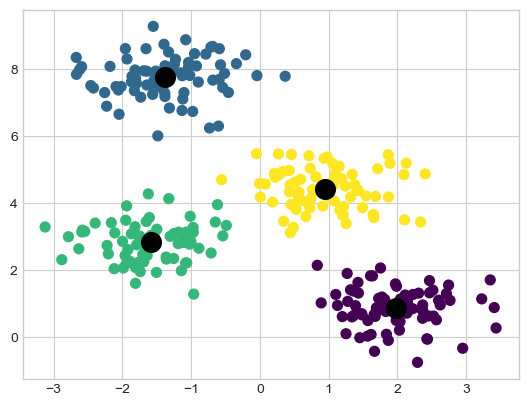

In [5]:
# The above example of the K-Means algorithm, but using SciKit-Learn
from sklearn.cluster import KMeans

# K-Means algorithm: selection of the number of clusters, training and prediction of results
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)

# visualization
plt.scatter(X[:, 0], X[:, 1], c=y_means, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)


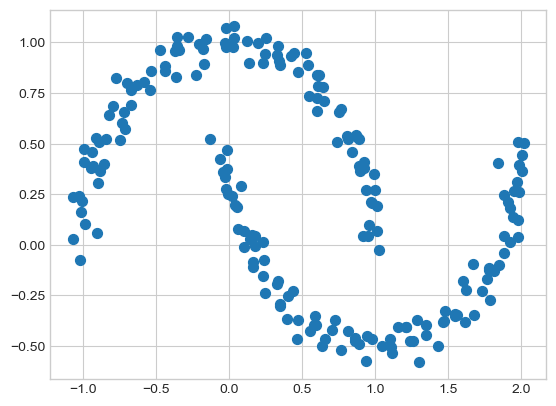

In [6]:
## K-Means algorithm for clusters with NONLINEAR boundaries!

# The boundaries between clusters determined by the K-Means algorithm will always be linear. 
# For more complex, nonlinear data, the kernel K-means algorithm implementation included in the Scikit-learn package 
# can be used as a SpectralClustering estimator to enable the K-Means algorithm to discover 
# nonlinear boundaries (it uses a graph to derive nearest neighbor information in a multidimensional data representation).

## data for cluster with nonlinear boundaries
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

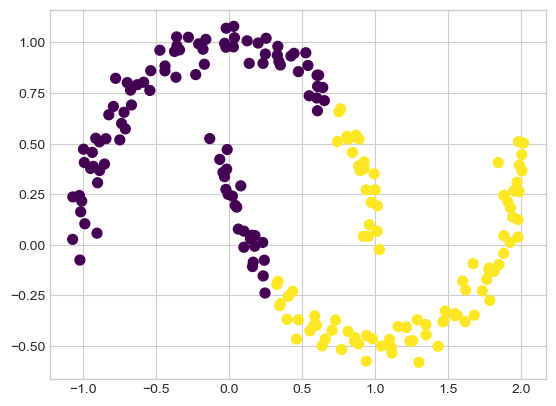

In [7]:
# On the above data, using the K-Means algorithm gives average results in determining the correct labels.
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


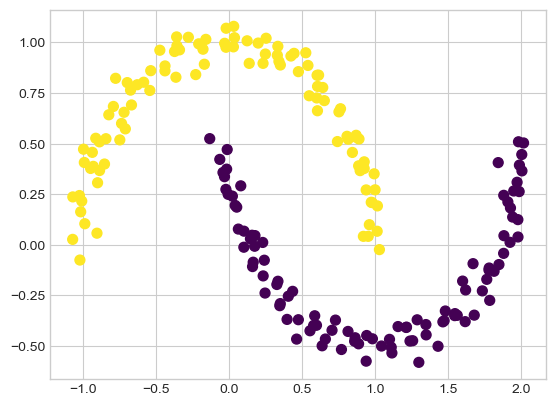

In [8]:
# using the mentioned implementation of the kernel K-Means algorithm - the SpectralClustering estimator improves this prediction
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')